In [1]:
import ta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
import akshare as ak


In [2]:

stock_us_hist_df = ak.stock_us_hist(symbol='106.TTE', start_date="20210101", end_date="20250330")
df = stock_us_hist_df.iloc[:,[0,2,3,4,5]]
df.columns = ['date','close','high','low','volume']

# Momentum indicators
df['roc'] = ta.momentum.roc(close=df.close) # Rate of Change (ROC)
df['rsi'] = ta.momentum.rsi(close=df.close) # Relative Strength Index (RSI)
df['tsi'] = ta.momentum.tsi(close=df.close) # True strength index (TSI)

# Volatility indicators
bb_indicator = ta.volatility.BollingerBands(close=df.close)
df['bb_bbhi'] = bb_indicator.bollinger_hband_indicator() # Bollinger Band high indicator
df['bb_bbli'] = bb_indicator.bollinger_lband_indicator() # Bollinger Band low indicator

# Trend indicators
#aroon_indicator = ta.trend.AroonIndicator(close=df.close)
aroon_indicator = ta.trend.AroonIndicator(df['high'], df['low'])
macd_indicator = ta.trend.MACD(close=df.close)
kst_indicator = ta.trend.KSTIndicator(close=df.close)
df['aroon_down'] = aroon_indicator.aroon_down() # Aroon Down Channel
df['aroon'] = aroon_indicator.aroon_indicator() # Aroon Indicator
df['aroon_up'] = aroon_indicator.aroon_up() # Aroon Up Channel
df['macd_line'] = macd_indicator.macd() # MACD Line
df['macd_hist'] = macd_indicator.macd_diff() # MACD Histogram
df['macd_signal'] = macd_indicator.macd_signal() # MACD Signal Line
df['kst'] = kst_indicator.kst() # Know Sure Thing (KST)
df['kst_diff'] = kst_indicator.kst_diff() # Diff Know Sure Thing (KST)
df['kst_signal'] = kst_indicator.kst_sig() # Signal Line Know Sure Thing (KST)
df['dpo'] = ta.trend.dpo(close=df.close) # Detrended Price Oscillator (DPO)
df['trix'] = ta.trend.trix(close=df.close) # Trix (TRIX)
df['sma_10'] = ta.trend.sma_indicator(close=df.close, window=10) # SMA n=10
df['sma_20'] = ta.trend.sma_indicator(close=df.close, window=20) # SMA n=20
df['sma_30'] = ta.trend.sma_indicator(close=df.close, window=30) # SMA n=30
df['sma_60'] = ta.trend.sma_indicator(close=df.close, window=60) # SMA n=60
df['ema_10'] = ta.trend.ema_indicator(close=df.close, window=10) # EMA n=10
df['ema_20'] = ta.trend.ema_indicator(close=df.close, window=20) # EMA n=20
df['ema_30'] = ta.trend.ema_indicator(close=df.close, window=30) # EMA n=30
df['ema_60'] = ta.trend.ema_indicator(close=df.close, window=60) # EMA n=60

# Volume indicators
df['obv'] = ta.volume.on_balance_volume(close=df.close, volume=df.volume) # On Balance Volume (OBV)
df['vpt'] = ta.volume.volume_price_trend(close=df.close, volume=df.volume) # Volume-price trend (VPT)
df['fi'] = ta.volume.force_index(close=df.close, volume=df.volume) # Force Index (FI)
df['nvi'] = ta.volume.negative_volume_index(close=df.close, volume=df.volume) # Negative Volume Index (NVI)


/var/folders/6r/z18bl2nj0nx5tvwj_2g191gh0000gn/T/ipykernel_55242/1283146419.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['roc'] = ta.momentum.roc(close=df.close) # Rate of Change (ROC)
/var/folders/6r/z18bl2nj0nx5tvwj_2g191gh0000gn/T/ipykernel_55242/1283146419.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rsi'] = ta.momentum.rsi(close=df.close) # Relative Strength Index (RSI)
/var/folders/6r/z18bl2nj0nx5tvwj_2g191gh0000gn/T/ipykernel_55242/1283146419.py:8: SettingWithCopyWarning: 
A valu

In [3]:
df = df.set_index('date')
df['datetime'] = pd.to_datetime(df.index)
df['min_sin'] = np.sin(2 * np.pi * df.datetime.dt.minute / 60)
df['min_cos'] = np.cos(2 * np.pi * df.datetime.dt.minute / 60)
df['hour_sin'] = np.sin(2 * np.pi * df.datetime.dt.hour / 60)
df['hour_cos'] = np.cos(2 * np.pi * df.datetime.dt.hour / 60)
df['day_sin'] = np.sin(2 * np.pi * df.datetime.dt.day / 30)
df['day_cos'] = np.cos(2 * np.pi * df.datetime.dt.day / 30)
df['month_sin'] = np.sin(2 * np.pi * df.datetime.dt.month / 12)
df['month_cos'] = np.cos(2 * np.pi * df.datetime.dt.month / 12)

df = df.drop(['datetime'], axis=1)
df = df.drop(['high'], axis=1)
df = df.drop(['low'], axis=1)

In [4]:

df_na = df.dropna(axis=0)
print(df_na.shape)
df_na.head()

(1005, 38)


,close,volume,roc,rsi,tsi,bb_bbhi,bb_bbli,aroon_down,aroon,aroon_up,...,fi,nvi,min_sin,min_cos,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos
date,,,,,,,,,,,,,,,,,,,,,
2021-03-30,47.08,1224895,-6.327099,50.457750,5.641728,0.0,0.0,88.0,-36.0,52.0,...,-292014.944847,1101.696318,0.0,1.0,0.0,1.0,-1.133108e-15,1.000000,1.000000,6.123234e-17
2021-03-31,46.54,2247170,-5.483347,47.739061,4.289774,0.0,0.0,84.0,-36.0,48.0,...,-423651.638441,1101.696318,0.0,1.0,0.0,1.0,2.079117e-01,0.978148,1.000000,6.123234e-17
2021-04-01,46.38,2402593,-4.646382,46.932173,2.951719,0.0,0.0,80.0,-36.0,44.0,...,-418046.387235,1101.696318,0.0,1.0,0.0,1.0,2.079117e-01,0.978148,0.866025,-5.000000e-01
2021-04-05,46.03,1523123,-5.926834,45.135017,1.320348,0.0,0.0,76.0,-36.0,40.0,...,-434481.624773,1093.382525,0.0,1.0,0.0,1.0,8.660254e-01,0.500000,0.866025,-5.000000e-01
2021-04-06,46.02,2267822,-2.582557,45.081900,-0.042303,0.0,0.0,72.0,-36.0,36.0,...,-375652.566948,1093.382525,0.0,1.0,0.0,1.0,9.510565e-01,0.309017,0.866025,-5.000000e-01


In [5]:
df_na.columns


Index(['close', 'volume', 'roc', 'rsi', 'tsi', 'bb_bbhi', 'bb_bbli',
       'aroon_down', 'aroon', 'aroon_up', 'macd_line', 'macd_hist',
       'macd_signal', 'kst', 'kst_diff', 'kst_signal', 'dpo', 'trix', 'sma_10',
       'sma_20', 'sma_30', 'sma_60', 'ema_10', 'ema_20', 'ema_30', 'ema_60',
       'obv', 'vpt', 'fi', 'nvi', 'min_sin', 'min_cos', 'hour_sin', 'hour_cos',
       'day_sin', 'day_cos', 'month_sin', 'month_cos'],
      dtype='object')

In [153]:

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer

TIMESTEP = 32

scaler = MinMaxScaler()
x_values = scaler.fit_transform(df_na.values)
y_values = x_values[:,0]
x_values = x_values[:,1:]


def create_time_series_data(X, time_steps):
    X_t = []
    for i in range(len(X) - time_steps):
        X_t.append(X[i:i + time_steps])  # 时间步数据
        
    return np.array(X_t)

x_values = create_time_series_data(x_values , TIMESTEP)

X_train = x_values[:-60]
X_test = x_values[-60:]
y_train = y_values[TIMESTEP:-60]
y_test = y_values[-60:]
print(f"X shape: {X_train.shape, X_test.shape}")  
print(f"y shape: {y_train.shape, y_test.shape}")  


X shape: ((913, 32, 37), (60, 32, 37))
y shape: ((913,), (60,))


In [145]:

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def get_angles(pos, i, d_model):
    # 这里的i等价与上面公式中的2i和2i+1
    angle_rates = 1 / np.power(10000, (2*(i // 2))/ np.float32(d_model))
    return pos * angle_rates

def positional_encoding(position, d_model):
    angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                           np.arange(d_model)[np.newaxis,:],
                           d_model)
    # 第2i项使用sin
    sines = np.sin(angle_rads[:, 0::2])
    # 第2i+1项使用cos
    cones = np.cos(angle_rads[:, 1::2])
    pos_encoding = np.concatenate([sines, cones], axis=-1)
    pos_encoding = pos_encoding[np.newaxis, ...]

    return tf.cast(pos_encoding, dtype=tf.float32)


# 定义自注意力层
class SelfAttentionLayer(layers.Layer):
    def __init__(self):
        super(SelfAttentionLayer, self).__init__()

    def build(self, input_shape):
        self.features = input_shape[-1]
        self.Wq = self.add_weight(shape=(self.features, self.features), initializer='random_normal', trainable=True)
        self.Wk = self.add_weight(shape=(self.features, self.features), initializer='random_normal', trainable=True)
        self.Wv = self.add_weight(shape=(self.features, self.features), initializer='random_normal', trainable=True)

    def call(self, inputs):
        # Compute queries, keys, and values
        Q = tf.matmul(inputs, self.Wq)
        K = tf.matmul(inputs, self.Wk)
        V = tf.matmul(inputs, self.Wv)

        # Compute the attention scores
        score = tf.matmul(Q, K, transpose_b=True)

        # Scale the scores
        scale = tf.sqrt(tf.cast(tf.shape(K)[-1], tf.float32))
        scaled_score = score / scale

        # Compute attention weights
        weights = tf.nn.softmax(scaled_score, axis=-1)

        # Compute the context vector
        context = tf.matmul(weights, V)
        return context

# 定义 LSTM 模型
def create_model(input_shape):
    
    # input embedding
    
    inputs = layers.Input(shape=input_shape) 
    
    x = layers.Dense(128, activation='relu')(inputs)
    x = layers.Dense(256, activation='relu')(x)
    
    position = positional_encoding(input_shape[0],256)
    x = x+position
    # self attention layer
    attention_out = SelfAttentionLayer()(x)
    # add and norm
    x1 = x + attention_out
    x1 = layers.LayerNormalization()(x)
    
    # # forward
    x2 = layers.Dense(256, activation='relu')(x1)
    x2 = layers.Dense(256, activation='relu')(x2)
    # add and norm
    x = x2 + x1
    x = layers.LayerNormalization()(x)
    
    # self attention layer2
    x = x+position
    attention_out = SelfAttentionLayer()(x)
    # add and norm
    x1 = x + attention_out
    x1 = layers.LayerNormalization()(x)
    
    # # forward
    x2 = layers.Dense(256, activation='relu')(x1)
    x2 = layers.Dense(256, activation='relu')(x2)
    # add and norm
    x = x2 + x1
    x = layers.LayerNormalization()(x)
    
    x = layers.Flatten()(x)
    # 添加全连接层
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dense(256, activation='relu')(x)
    outputs = layers.Dense(1)(x)  # 最后的输出层

    model = keras.Model(inputs, outputs)
    model.compile(optimizer='adam', loss='mse')
    return model

# 创建模型
input_shape = (TIMESTEP, 37)  # 时间步和特征数
model = create_model(input_shape)



In [142]:
# 训练模型
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 2.2023 - val_loss: 0.3769
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0981 - val_loss: 0.0279
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0264 - val_loss: 0.0103
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0067 - val_loss: 0.0094
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0047 - val_loss: 0.0073
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0047 - val_loss: 0.0064
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0035 - val_loss: 0.0062
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0028 - val_loss: 0.0105
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0065 - val_loss: 0.0075
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0029 - val_loss: 0.0063
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0038 - val_loss: 0.0066
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


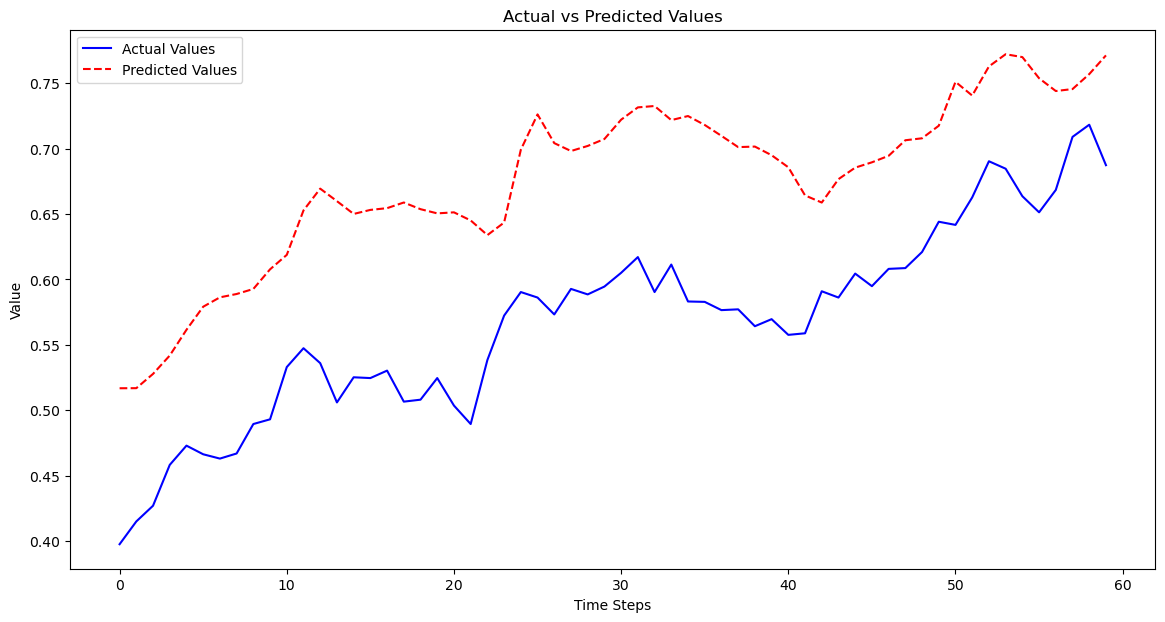

In [143]:
# Make predictions
y_pred = model.predict(X_test)

# Plotting function
def plot_predictions(y_true, y_pred):
    plt.figure(figsize=(14, 7))
    plt.plot(y_true, label='Actual Values', color='b')
    plt.plot(y_pred, label='Predicted Values', color='r', linestyle='--')
    plt.title('Actual vs Predicted Values')
    plt.xlabel('Time Steps')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

# Call the plotting function
plot_predictions(y_test, y_pred)

Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 68.8656
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0654
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.1271
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0197
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0135
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0131
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2885
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0146
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0061
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1613
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0666
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0056
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0037
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0028
Epoch 15/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0024
Epo

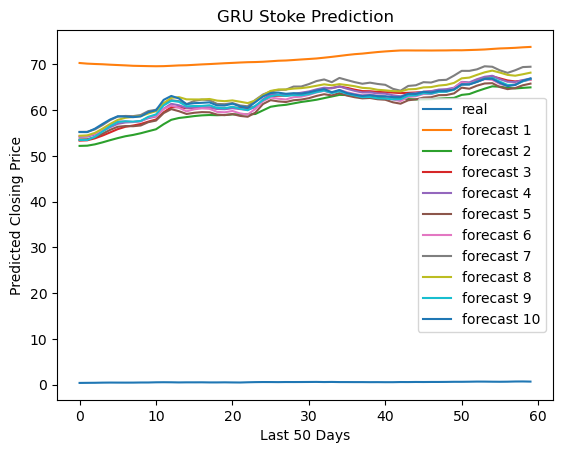

In [ ]:
predict0 = []
for i in range(10):
    model.fit(X_train, y_train, batch_size=32, epochs=50)

    predictions = model.predict(X_test)

    dummy = np.zeros((len(predictions), df_na.shape[1]))
    dummy[:, 0] = predictions[:, 0]
    predictions1 = scaler.inverse_transform(dummy)[:, 0]

    mse = np.mean((predictions1 - y_test) ** 2)
    acc = 100 * (1 - np.sqrt(np.mean(np.square((y_test - predictions1) / y_test))))

    print(f"mse: {mse}")
    print(f"acc: {acc}")
    predict0.append(predictions1)
    


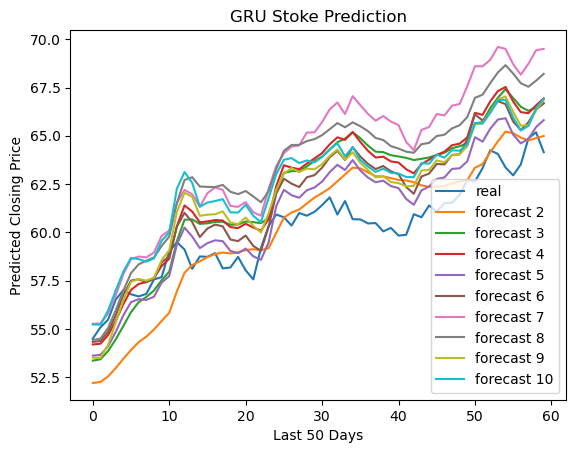

In [155]:
# dummy = np.zeros((len(y_test), df_na.shape[1]))
# dummy[:, 0] = y_test
# y_test = scaler.inverse_transform(dummy)[:, 0]

plt.plot(y_test, label='real')
for i in range(1,10):
    plt.plot(predict0[i], label='forecast %d'%(i + 1))
plt.title('GRU Stoke Prediction')
plt.xlabel('Last 50 Days')
plt.ylabel('Predicted Closing Price')
plt.legend()
plt.show()